In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hf = pd.read_csv('home_prices.csv')

In [3]:
hf.head(2)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0


throwing all irrelevant columns

In [4]:
hf.columns[[0, 2, 3, 15, 17, 18]]

Index(['Unnamed: 0', 'info', 'z_address', 'zestimate', 'zipcode', 'zpid'], dtype='object')

In [5]:
hf.drop(['Unnamed: 0', 'info', 'z_address', 'zestimate', 'zipcode', 'zpid'], axis=1, inplace=True)

In [6]:
hf.head(2)

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,"975,700"
1,Address: 260 King Street #475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,"975,700"


convert zindexvalue from str to int

In [7]:
type(hf['zindexvalue'][0])

str

In [8]:
hf['zindexvalue'] = hf['zindexvalue'].str.replace(',','')
hf['zindexvalue'] = hf['zindexvalue'].astype(int)

In [9]:
hf.head()
hf.info()
hf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11330 non-null  object 
 1   bathrooms      11330 non-null  float64
 2   bedrooms       11330 non-null  float64
 3   finishedsqft   11330 non-null  float64
 4   lastsolddate   11330 non-null  object 
 5   lastsoldprice  11330 non-null  float64
 6   latitude       11330 non-null  float64
 7   longitude      11330 non-null  float64
 8   neighborhood   11330 non-null  object 
 9   totalrooms     11330 non-null  float64
 10  usecode        11330 non-null  object 
 11  yearbuilt      11330 non-null  float64
 12  zindexvalue    11330 non-null  int32  
dtypes: float64(8), int32(1), object(4)
memory usage: 1.1+ MB


,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002284592F948>,
      dtype=object)

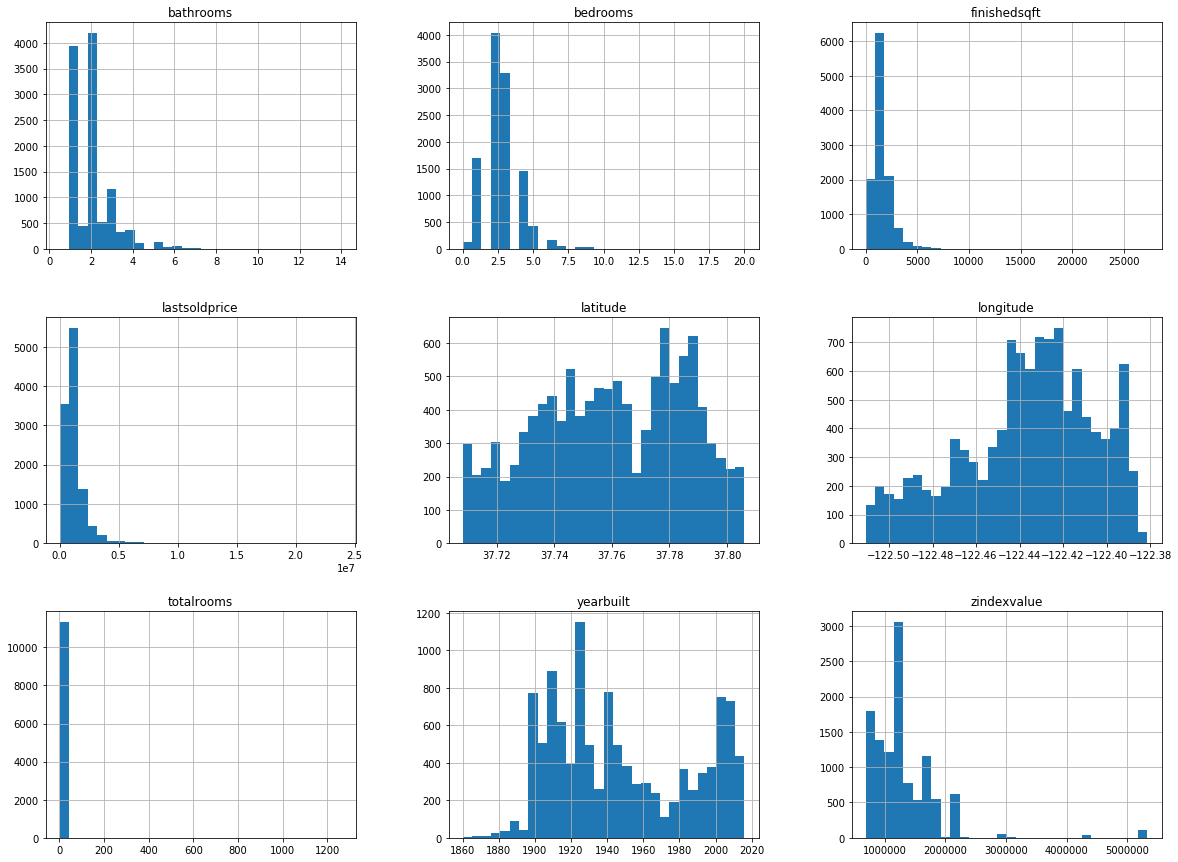

In [10]:
# histograms of all features
hf.hist(bins=30, figsize=(20,15))
# histograms of a few features
#hf[ ['bathrooms', 'bedrooms'] ].hist(bins=30, figsize=(12,4))

At first sight we can see that the features range is quite large.
For that we need to scale the features for some of the algorithms

Let's see how the positions of houses distributes

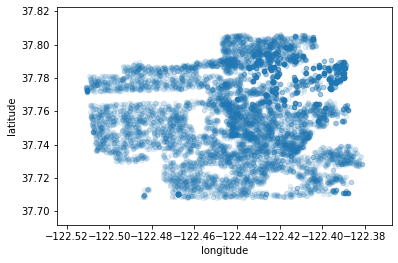

In [11]:
hf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

And now we'll add the lastsoldprice column

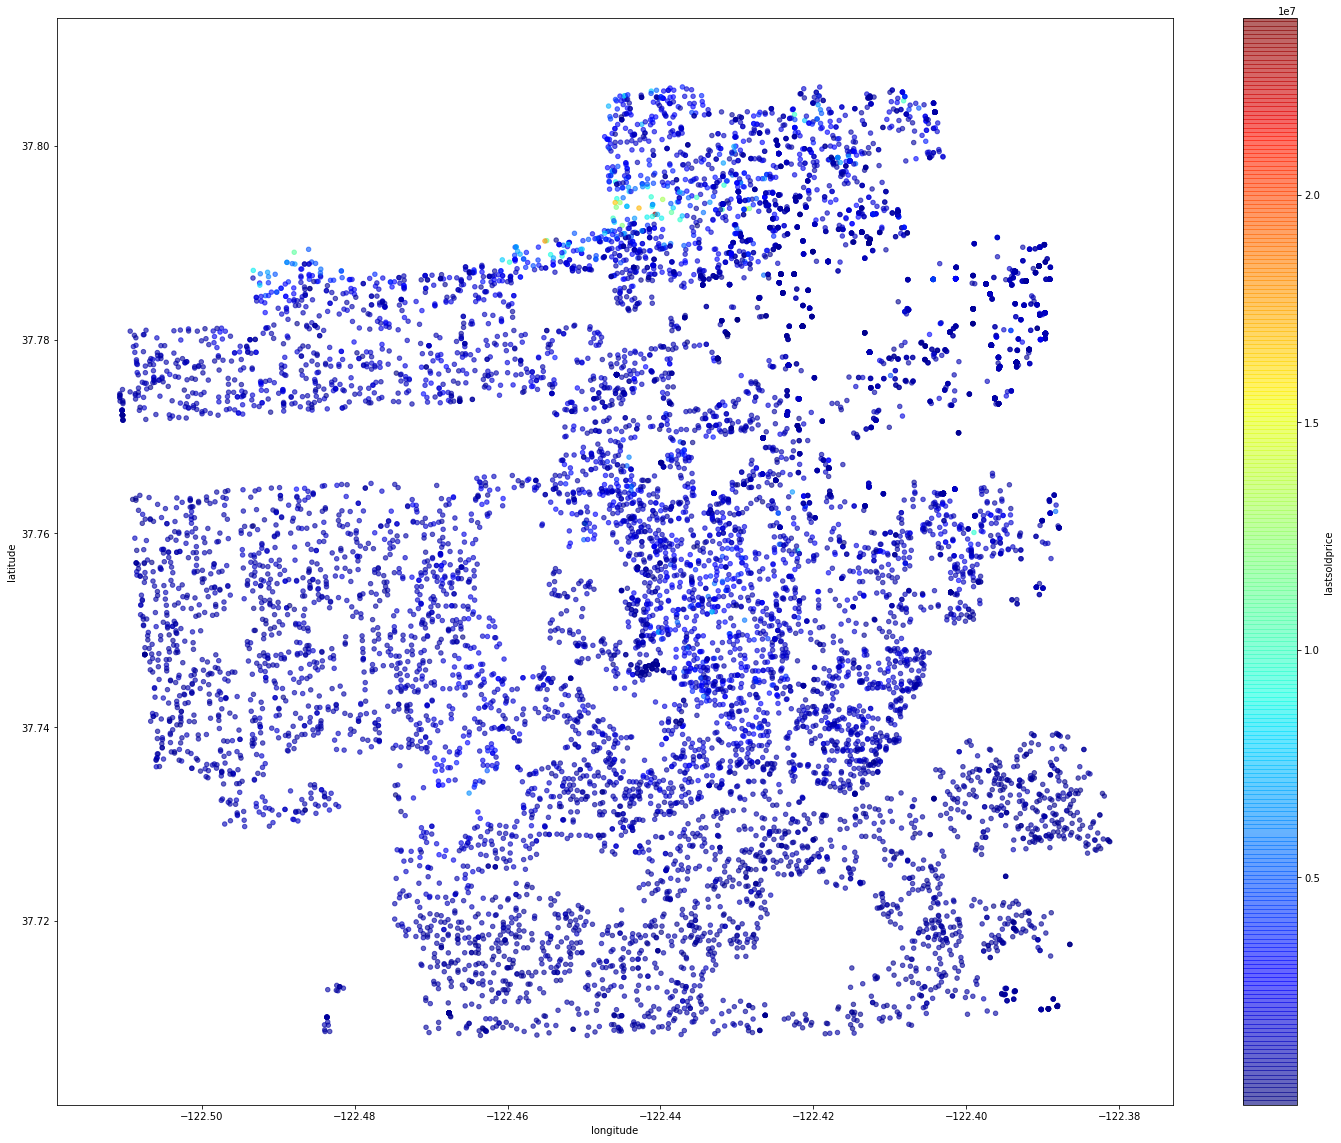

In [12]:
hf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.6, figsize=(25,20),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

Now let's see what is the correlation between each of the features to the 'last_sold_price'

In [226]:
# we created a correlation matrix, asking for the 'lastsoldprice', sorted
hf.corr().lastsoldprice.sort_values(ascending=False)
# nice row - I can take it!

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

In [14]:
###-----------------Conclusions--------------------###
# 1. Strong correlations - finishedsqft, bathrooms
# 2. Negative correlation - yearbuilt (small one)
# 3. Values close to zero - no linear correlation

If we wish to have a closer look on our strongest features, we can scatter plot them - 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


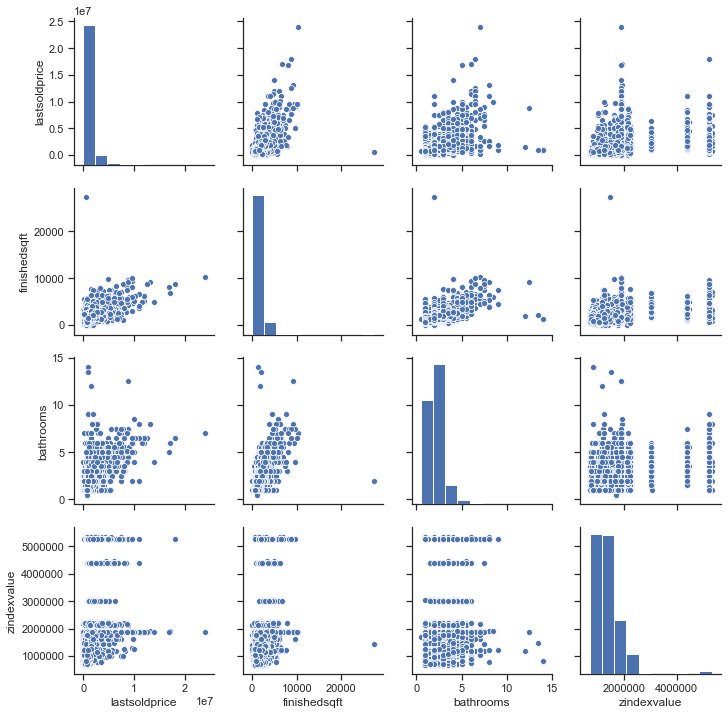

In [15]:
import seaborn as sns
strg_feat = ["lastsoldprice", "finishedsqft", "bathrooms", "zindexvalue"]
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(hf[strg_feat])

The most promising relation of  'lastsoldprice' is observed with 'finishedsqft'  

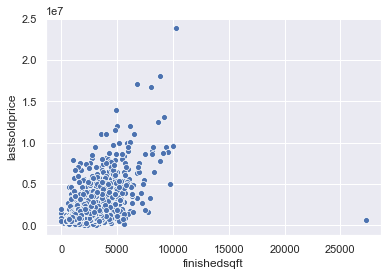

In [16]:
# default seeings
sns.set()
sns.scatterplot(x="finishedsqft", y="lastsoldprice", data=hf)
# I could add a linear fit line, to estimate the ratio
# maybe take out these two outliers

In [17]:
## It is possible to add here TREND LINE

Let's add another feature "price per sqft" and see how strong it is

In [10]:
hf['price_per_sqft'] = hf['lastsoldprice']/hf['finishedsqft']

In [11]:
hf.corr().lastsoldprice.sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
bathrooms         0.536880
zindexvalue       0.460429
bedrooms          0.395478
latitude          0.283107
totalrooms        0.093527
price_per_sqft    0.005008
longitude        -0.052595
yearbuilt        -0.189055
Name: lastsoldprice, dtype: float64

In [12]:
# We can see that it has no linear relation with "lastsoldprice"
# Let's use this parameter with grouping different neighbohoods

In [13]:
# 1. Distribution of neighborhoods
# 2. Total number of neighborhoods
hf['neighborhood'].value_counts()
#len(hf['neighborhood'].value_counts())

Mission             540
Bernal Heights      525
South of Market     524
South Beach         461
Pacific Heights     439
                   ... 
North Beach          31
Lakeside             29
Little Hollywood     12
North Waterfront      8
Daly City             3
Name: neighborhood, Length: 71, dtype: int64

In [14]:
## We have 71 neighborhoods

In [15]:
# it's the same as value_counts(), but not sorted
frequ = hf.groupby('neighborhood').count().address
mean_price = hf.groupby('neighborhood')['price_per_sqft'].mean()
mean_price

neighborhood
Bayview                417.049058
Bernal Heights        3158.199830
Buena Vista Park       952.912618
Central Richmond       659.691461
Central Sunset         610.067525
                         ...     
West Portal            707.303289
Western Addition       605.223562
Westwood Highlands     697.829959
Westwood Park          718.144842
Yerba Buena           1210.598421
Name: price_per_sqft, Length: 71, dtype: float64

In [16]:
# We concat the prices according to the frequency it appears
# and according to the mean price_per_sqft grouped by neighbohood
cluster = pd.concat([frequ, mean_price], axis=1)
cluster['neighborhood'] = cluster.index
cluster.columns = ['frequency', 'price_per_sqft','neighborhood']
# renaming the columns
cluster

,frequency,price_per_sqft,neighborhood
neighborhood,,,
Bayview,354,417.049058,Bayview
Bernal Heights,525,3158.199830,Bernal Heights
Buena Vista Park,70,952.912618,Buena Vista Park
Central Richmond,227,659.691461,Central Richmond
Central Sunset,229,610.067525,Central Sunset
...,...,...,...
West Portal,43,707.303289,West Portal
Western Addition,107,605.223562,Western Addition
Westwood Highlands,56,697.829959,Westwood Highlands


In [17]:
cluster.describe()

,frequency,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


Now let's divide the neighborhoods into three groups (of course we can divide it differentely) - 
   1. Low price, 2. High price low frequency, 3. High price high frequency

In [18]:
# price_per_sqft = 756 it's the 50% of the records
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index
#len(cluster1)

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

In [19]:
# This is my way - using a double condition
cluster2 = cluster[ (cluster.price_per_sqft >= 756) & (cluster.frequency <123) ]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

In [20]:
# frequency = 123 it's the 50% of the records
cluster3 = cluster[ (cluster.price_per_sqft >= 756) & (cluster.frequency >= 123) ]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

Now we'll add a new column expresses the clustering we did here - 

In [21]:
# This function will return 
def get_group(x):
    if x in cluster1.index:
    # we run on indices = names
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
#sf['group'] = sf.neighborhood.apply(get_group)

In [22]:
# a few tests
get_group(hf.neighborhood[8])
get_group(hf.neighborhood[537])

'high_price_high_freq'

In [23]:
# Applying on all features at once using 'apply'
hf['clust_price'] = hf.neighborhood.apply(get_group)
# We took the neighborhood column and applied on it at once

In [24]:
hf.head(3)

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue,price_per_sqft,clust_price
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,975700,1246.404602,high_price_high_freq
1,Address: 260 King Street #475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,975700,830.564784,high_price_high_freq
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1277600,1049.122807,high_price_high_freq


Finding and dropimg all irrelevant columns, or the ones with a weak correlation

At this stage maybe it's better to make a COPY here

In [25]:
hf.columns#[[0, 4, 6, 7, 8, 13]]

Index(['address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zindexvalue', 'price_per_sqft', 'clust_price'],
      dtype='object')

In [26]:
# First we make a copy...
hf1 = hf.copy()
hf1.drop(['address', 'lastsolddate', 'latitude', 'longitude',
         'neighborhood', 'price_per_sqft'], axis=1, inplace=True)

In [27]:
hf1.head()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,totalrooms,usecode,yearbuilt,zindexvalue,clust_price
0,2.0,2.0,1043.0,1300000.0,4.0,Condominium,2007.0,975700,high_price_high_freq
1,1.0,1.0,903.0,750000.0,3.0,Condominium,2004.0,975700,high_price_high_freq
2,4.0,3.0,1425.0,1495000.0,6.0,Condominium,2003.0,1277600,high_price_high_freq
3,3.0,3.0,2231.0,2700000.0,10.0,SingleFamily,1927.0,1277600,high_price_high_freq
4,3.0,3.0,1300.0,1530000.0,4.0,SingleFamily,1900.0,1248000,high_price_high_freq


#### Now we neet to work with hf1 as our dataframe

### How can we reorganize the features so 'lastsoldprice' will be the last?

In [28]:
hf1.columns

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'lastsoldprice', 'totalrooms',
       'usecode', 'yearbuilt', 'zindexvalue', 'clust_price'],
      dtype='object')

In [29]:
# just giving the names in a list with the desired order
hf1 = hf1[ ['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms',
          'usecode', 'yearbuilt', 'zindexvalue', 'clust_price', 'lastsoldprice'] ]

In [30]:
hf1.head(2)

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,clust_price,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,high_price_high_freq,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,high_price_high_freq,750000.0


### Getting ready for the models, creating X and y

In [31]:
X = hf1.drop(['lastsoldprice'], axis=1)
y = hf1['lastsoldprice']

Let's create dummy variables for 'usecode' and 'clust_price'

In [32]:
X = pd.get_dummies(X,columns=['usecode','clust_price'],drop_first=True)

In [33]:
X.head(2)

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse,clust_price_high_price_low_freq,clust_price_low_price
0,2.0,2.0,1043.0,4.0,2007.0,975700,1,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700,1,0,0,0,0,0,0,0,0,0,0


In [34]:
col_names = X.columns
col_names

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt',
       'zindexvalue', 'usecode_Condominium', 'usecode_Cooperative',
       'usecode_Duplex', 'usecode_Miscellaneous', 'usecode_Mobile',
       'usecode_MultiFamily2To4', 'usecode_MultiFamily5Plus',
       'usecode_SingleFamily', 'usecode_Townhouse',
       'clust_price_high_price_low_freq', 'clust_price_low_price'],
      dtype='object')

#### By the way, what is this 'zindexvalue'? Maybe we want to throw it also?

Scaling our data (big range of values)

### We have categorical features - so we CAN'T scale!!!

In [272]:
# When we do "scale" maybe it's better to use another parameter
# The problem is that the properties of X as a dataframe has lost (columns etc.)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler1 = StandardScaler()
#X = scaler1.fit_transform(X)

### Trying to overcome this problem using MinMaxScaler (between 0 to 1)

In [274]:
X.columns[range(6)]
X.iloc[:,0:6]

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue
0,2.0,2.0,1043.0,4.0,2007.0,975700
1,1.0,1.0,903.0,3.0,2004.0,975700
2,4.0,3.0,1425.0,6.0,2003.0,1277600
3,3.0,3.0,2231.0,10.0,1927.0,1277600
4,3.0,3.0,1300.0,4.0,1900.0,1248000
...,...,...,...,...,...,...
11325,2.0,3.0,2100.0,10.0,1900.0,1628900
11326,2.0,2.0,977.0,5.0,2006.0,957300
11327,1.0,2.0,875.0,4.0,1950.0,804400
11328,1.0,2.0,697.0,4.0,1904.0,1030300


In [275]:
scaler2 = MinMaxScaler()
X.iloc[:,0:6] = scaler2.fit_transform(X.iloc[:,0:6])

In [294]:
X.head(10)

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse,clust_price_high_price_low_freq,clust_price_low_price
0,0.111111,0.10,0.038205,0.002375,0.942308,0.061911,1,0,0,0,0,0,0,0,0,0,0
1,0.037037,0.05,0.033072,0.001584,0.923077,0.061911,1,0,0,0,0,0,0,0,0,0,0
2,0.259259,0.15,0.052211,0.003959,0.916667,0.126900,1,0,0,0,0,0,0,0,0,0,0
3,0.185185,0.15,0.081763,0.007126,0.429487,0.126900,0,0,0,0,0,0,0,1,0,0,0
4,0.185185,0.15,0.047628,0.002375,0.256410,0.120528,0,0,0,0,0,0,0,1,0,0,0
5,0.037037,0.10,0.045795,0.003167,0.410256,0.029039,0,0,0,0,0,0,0,1,0,0,1
6,0.037037,0.15,0.037802,0.003959,0.506410,0.016059,0,0,0,0,0,0,0,1,0,0,1
7,0.037037,0.10,0.043961,0.003167,0.410256,0.065549,0,0,0,0,0,0,0,1,0,0,1
8,0.222222,0.20,0.098959,0.006334,0.333333,0.235480,0,0,0,0,0,0,0,1,0,0,0
9,0.111111,0.15,0.073880,0.004751,0.192308,0.115534,1,0,0,0,0,0,0,0,0,0,0


In [279]:
### Very nice!!
### Because I worked only on specific row, I don't need to concatanate
### It was done automatically :-)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### All types of Models --

In [1]:
from sklearn import svm
from sklearn.svm import SVC
import sklearn.tree as skt
import sklearn.linear_model as skl
import sklearn.naive_bayes as sknb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# 1. I stopped here. Let's bring another models (KNN, Naive Bayes...)
# 2. Let's create a function who calculates for ANY model (I have it already)
# 3. Do I need to do Cross Validation???

In [3]:
# Good Luck!

In [4]:
def model_score(X,y,model):
    global M
    if model == 'LR':
        model = skl.LinearRegression()
    elif model == 'DT': 
        model = skt.DecisionTreeRegressor()
    elif model == 'RF':
        model = RandomForestRegressor()
    elif model == 'KNN':
        model = KNeighborsRegressor(n_neighbors=10)
    elif model == 'GBR':
        model = GradientBoostingRegressor(max_depth=4) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model.fit(X_train,y_train)
    print("Train score: %.3f" % model.score(X_train,y_train))
    print("Test score:  %.3f" % model.score(X_test,y_test))
    M = model
    return model

RF model - scanning over the max_depth paramter

In [41]:
# with scaling
model_score(X,y,'RF')

Train score: 0.955
Test score:  0.697


RandomForestRegressor()

In [286]:
# SEMI - scaling
model_score(X,y,'RF')

Train score: 0.951
Test score:  0.697


RandomForestRegressor()

In [42]:
# no scaling
model_score(X,y,'RF')

Train score: 0.951
Test score:  0.700


RandomForestRegressor()

In [68]:
# Very big over fit... ~25% !!!

In [103]:
#max_depth=3
model_score(X,y,'RF')

Train score: 0.611
Test score:  0.561


RandomForestRegressor(max_depth=3)

In [105]:
#max_depth=4
model_score(X,y,'RF')

Train score: 0.671
Test score:  0.602


RandomForestRegressor(max_depth=4)

In [107]:
#max_depth=5
model_score(X,y,'RF')

Train score: 0.717
Test score:  0.637


RandomForestRegressor(max_depth=5)

In [109]:
#max_depth=6
model_score(X,y,'RF')

Train score: 0.764
Test score:  0.662


RandomForestRegressor(max_depth=6)

In [288]:
# SEMI - scaling
# max_depth=6
model_score(X,y,'RF')

Train score: 0.767
Test score:  0.662


RandomForestRegressor(max_depth=6)

In [111]:
#max_depth=7
model_score(X,y,'RF')

Train score: 0.805
Test score:  0.680


RandomForestRegressor(max_depth=7)

In [113]:
#max_depth=8
model_score(X,y,'RF')

Train score: 0.831
Test score:  0.681


RandomForestRegressor(max_depth=8)

In [69]:
### Need to decide where to stop, maybe on max_depth=6 (only 10% over-fit)

GBR model - non normalized data

In [51]:
#max_depth=3
model_score(X,y,'GBR')

Train score: 0.780
Test score:  0.677


GradientBoostingRegressor()

In [71]:
#max_depth=4
model_score(X,y,'GBR')

Train score: 0.830
Test score:  0.689


GradientBoostingRegressor(max_depth=4)

In [53]:
#max_depth=5
model_score(X,y,'GBR')

Train score: 0.876
Test score:  0.694


GradientBoostingRegressor(max_depth=5)

In [55]:
#max_depth=7
model_score(X,y,'GBR')

Train score: 0.939
Test score:  0.696


GradientBoostingRegressor(max_depth=7)

In [57]:
#max_depth=10
model_score(X,y,'GBR')

Train score: 0.984
Test score:  0.704


GradientBoostingRegressor(max_depth=10)

In [59]:
#max_depth=15
model_score(X,y,'GBR')

Train score: 0.996
Test score:  0.637


GradientBoostingRegressor(max_depth=15)

In [61]:
# 1. I would probably choose something around max_depth=5
# 2. It's better play a bit more with these parameters, getting to know the model

LR - model ; not much to play with, just to know where are we standing...

In [114]:
# with scaling
model_score(X,y,'LR')

Train score: 0.554
Test score:  0.568


LinearRegression()

In [259]:
# no scaling
model_score(X,y,'LR')

Train score: 0.554
Test score:  0.568


LinearRegression()

KNN - model ; let's manually check for different K's

In [289]:
# k = 5 - SEMI - scaling
model_score(X,y,'KNN')

Train score: 0.759
Test score:  0.636


KNeighborsRegressor()

In [116]:
# k = 5 - with scaling
model_score(X,y,'KNN')

Train score: 0.760
Test score:  0.630


KNeighborsRegressor()

In [261]:
# k = 5 - no scaling
model_score(X,y,'KNN')

Train score: 0.749
Test score:  0.602


KNeighborsRegressor()

In [293]:
# k = 10 - SEMI - scaling
model_score(X,y,'KNN')

Train score: 0.702
Test score:  0.636


KNeighborsRegressor(n_neighbors=10)

In [118]:
# k = 10
model_score(X,y,'KNN')

Train score: 0.718
Test score:  0.640


KNeighborsRegressor(n_neighbors=10)

In [291]:
# k = 20 - SEMI - scaling
model_score(X,y,'KNN')

Train score: 0.660
Test score:  0.622


KNeighborsRegressor(n_neighbors=20)

In [122]:
# k = 20
model_score(X,y,'KNN')

Train score: 0.682
Test score:  0.647


KNeighborsRegressor(n_neighbors=20)

In [92]:
# k = 30
model_score(X,y,'KNN')

Train score: 0.664
Test score:  0.639


KNeighborsRegressor(n_neighbors=30)

In [120]:
# k = 15
model_score(X,y,'KNN')

Train score: 0.697
Test score:  0.640


KNeighborsRegressor(n_neighbors=15)

In [96]:
# k = 25
model_score(X,y,'KNN')

Train score: 0.669
Test score:  0.643


KNeighborsRegressor(n_neighbors=25)

In [97]:
# A FEW COMMENTS - 
# 1. On some level what I did is better than sensitivity check
# 2. Here we have both train & test scors!
# 3. I could do it also in sensitivity check, with plots...
# 4. Here I would probably chose to stop on K=20, high score and small over-fit

In [ ]:
##----------------------------------------------------------------------------------##

### Voting process

In [74]:
clf1 = skl.LinearRegression()
clf2 = RandomForestRegressor(max_depth=7)
clf3 = KNeighborsRegressor(n_neighbors=20)
clf4 = GradientBoostingRegressor(max_depth=5) 

In [75]:
emodel = VotingRegressor(estimators=[
    ('lr', clf1),
    ('rf', clf2),
    ('knn', clf3),
    ('gbr', clf4)
],
   )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
emodel.fit(X_train, y_train)
print("Train score: %.3f" % emodel.score(X_train,y_train))
print("Test score : %.3f" % emodel.score(X_test,y_test))

Train score: 0.811
Test score : 0.682


In [179]:
# Observations - 
# 1. When we run it "free" only rf and knn we get - Train score: 0.886 and Test score:0.688, 20% over-fit
# 2. LR doesn't contribute to this VOTING process (rotten apple)
# 3. As we limit rf (max_depth=7) and knn (n_neighbors=20) the we get 0.766 and 0.682 (feels like a better results) 

In [ ]:
##------------------------------------------------------------------------------------------------------------------##

### Let's try now iterate over the columns and calculate scores...

We'll start with KNN

In [77]:
col_names

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt',
       'zindexvalue', 'usecode_Condominium', 'usecode_Cooperative',
       'usecode_Duplex', 'usecode_Miscellaneous', 'usecode_Mobile',
       'usecode_MultiFamily2To4', 'usecode_MultiFamily5Plus',
       'usecode_SingleFamily', 'usecode_Townhouse',
       'clust_price_high_price_low_freq', 'clust_price_low_price'],
      dtype='object')

In [76]:
# knn classifier
clf3

KNeighborsRegressor(n_neighbors=20)

In [134]:
# What if we take out more features ???
list(X_train.columns[6:15])
# E.G - it lokks as if we can throw all 'usecode' categoricals

['usecode_Condominium',
 'usecode_Cooperative',
 'usecode_Duplex',
 'usecode_Miscellaneous',
 'usecode_Mobile',
 'usecode_MultiFamily2To4',
 'usecode_MultiFamily5Plus',
 'usecode_SingleFamily',
 'usecode_Townhouse']

In [164]:
X_tr = X_train.drop(list(X_train.columns[0:5]),axis=1)
X_ts = X_test.drop(list(X_train.columns[0:5]),axis=1)

In [165]:
clf3.fit(X_tr, y_train)

KNeighborsRegressor(n_neighbors=20)

In [166]:
train_score = round(clf3.score(X_tr, y_train),4)
train_score

0.4699

In [167]:
test_score = round(clf3.score(X_ts, y_test),4)
test_score

0.4118

In [79]:
score_dict = {}
for i in (list(col_names)):
        X_tr = X_train.drop([i], axis=1)
        X_ts = X_test.drop([i], axis=1) 
        clf3.fit(X_tr, y_train)
        train_score = round(clf3.score(X_tr, y_train),4)
        test_score = round(clf3.score(X_ts, y_test),4)
        score_dict[i] = [train_score, test_score]

In [98]:
score_dict

{'bathrooms': [0.6315, 0.578],
 'bedrooms': [0.6315, 0.5782],
 'finishedsqft': [0.4804, 0.3915],
 'totalrooms': [0.6315, 0.578],
 'yearbuilt': [0.6309, 0.5779],
 'zindexvalue': [0.5073, 0.4471],
 'usecode_Condominium': [0.6315, 0.5782],
 'usecode_Cooperative': [0.6315, 0.5782],
 'usecode_Duplex': [0.6315, 0.5782],
 'usecode_Miscellaneous': [0.6315, 0.5782],
 'usecode_Mobile': [0.6315, 0.5782],
 'usecode_MultiFamily2To4': [0.6315, 0.5782],
 'usecode_MultiFamily5Plus': [0.6315, 0.5782],
 'usecode_SingleFamily': [0.6315, 0.5782],
 'usecode_Townhouse': [0.6315, 0.5782],
 'clust_price_high_price_low_freq': [0.6315, 0.5782],
 'clust_price_low_price': [0.6315, 0.5782]}

In [ ]:
# Nice and indented representation of the dictionary

In [100]:

len_keys = [len(i) for i in score_dict.keys()]
n_max = max(len_keys)
for i in score_dict.keys():
    n = len(i)
    print(i, (n_max-n)*' ',score_dict[i])
    

bathrooms                        [0.6315, 0.578]
bedrooms                         [0.6315, 0.5782]
finishedsqft                     [0.4804, 0.3915]
totalrooms                       [0.6315, 0.578]
yearbuilt                        [0.6309, 0.5779]
zindexvalue                      [0.5073, 0.4471]
usecode_Condominium              [0.6315, 0.5782]
usecode_Cooperative              [0.6315, 0.5782]
usecode_Duplex                   [0.6315, 0.5782]
usecode_Miscellaneous            [0.6315, 0.5782]
usecode_Mobile                   [0.6315, 0.5782]
usecode_MultiFamily2To4          [0.6315, 0.5782]
usecode_MultiFamily5Plus         [0.6315, 0.5782]
usecode_SingleFamily             [0.6315, 0.5782]
usecode_Townhouse                [0.6315, 0.5782]
clust_price_high_price_low_freq  [0.6315, 0.5782]
clust_price_low_price            [0.6315, 0.5782]


In [332]:
# How to finf MAX in the DICT ?
# Pay attention - what is the feature we're looking to maximize...

In [342]:
max_value = max(score_dict.values())  
max_keys = [k for k, v in score_dict.items() if v == max_value] 
print(max_value, max_keys)

[0.6836, 0.6437] ['yearbuilt']


In [78]:
# Maybe it was worth looking here at feature importance and compare to the results

Let's do it now with Random Forest

In [139]:
clf2

RandomForestRegressor(max_depth=7)

In [140]:
score_dict = {}
for i in (list(col_names)):
        X_tr = X_train.drop([i], axis=1)
        X_ts = X_test.drop([i], axis=1) 
        clf2.fit(X_tr, y_train)
        train_score = round(clf2.score(X_tr, y_train),4)
        test_score = round(clf2.score(X_ts, y_test),4)
        score_dict[i] = [train_score, test_score]

In [141]:
score_dict

{'bathrooms': [0.7933, 0.6595],
 'bedrooms': [0.8018, 0.6819],
 'finishedsqft': [0.7658, 0.645],
 'totalrooms': [0.8011, 0.6797],
 'yearbuilt': [0.7987, 0.6791],
 'zindexvalue': [0.7619, 0.6268],
 'usecode_Condominium': [0.8029, 0.677],
 'usecode_Cooperative': [0.8043, 0.6796],
 'usecode_Duplex': [0.8032, 0.6802],
 'usecode_Miscellaneous': [0.8047, 0.6793],
 'usecode_Mobile': [0.7986, 0.6758],
 'usecode_MultiFamily2To4': [0.8025, 0.6788],
 'usecode_MultiFamily5Plus': [0.8015, 0.6856],
 'usecode_SingleFamily': [0.7939, 0.6778],
 'usecode_Townhouse': [0.802, 0.6813],
 'clust_price_high_price_low_freq': [0.8023, 0.6726],
 'clust_price_low_price': [0.7946, 0.6677]}

In [142]:
max_value = max(score_dict.values())  
max_keys = [k for k, v in score_dict.items() if v == max_value] 
print(max_value, max_keys)

[0.8047, 0.6793] ['usecode_Miscellaneous']


In [143]:
len_keys = [len(i) for i in score_dict.keys()]
n_max = max(len_keys)
for i in score_dict.keys():
    n = len(i)
    print(i, (n_max-n)*' ',score_dict[i])

bathrooms                        [0.7933, 0.6595]
bedrooms                         [0.8018, 0.6819]
finishedsqft                     [0.7658, 0.645]
totalrooms                       [0.8011, 0.6797]
yearbuilt                        [0.7987, 0.6791]
zindexvalue                      [0.7619, 0.6268]
usecode_Condominium              [0.8029, 0.677]
usecode_Cooperative              [0.8043, 0.6796]
usecode_Duplex                   [0.8032, 0.6802]
usecode_Miscellaneous            [0.8047, 0.6793]
usecode_Mobile                   [0.7986, 0.6758]
usecode_MultiFamily2To4          [0.8025, 0.6788]
usecode_MultiFamily5Plus         [0.8015, 0.6856]
usecode_SingleFamily             [0.7939, 0.6778]
usecode_Townhouse                [0.802, 0.6813]
clust_price_high_price_low_freq  [0.8023, 0.6726]
clust_price_low_price            [0.7946, 0.6677]


In [362]:
#clf2.feature_importances_.shape
#clf2.fit(X_train, y_train)
X_train.columns.shape

(17,)

In [152]:
X_tr = X_train.drop(list(X_train.columns[1:6]),axis=1)
X_ts = X_test.drop(list(X_train.columns[1:6]),axis=1)

In [153]:
clf2.fit(X_tr, y_train)

RandomForestRegressor(max_depth=7)

In [154]:
train_score = round(clf2.score(X_tr, y_train),4)
train_score

0.5742

In [155]:
test_score = round(clf2.score(X_ts, y_test),4)
test_score

0.5074

In [364]:
feat_imp = pd.DataFrame(index=X_train.columns, data=clf2.feature_importances_, columns=['fi_RF'])
feat_imp = feat_imp.sort_values(by='fi_RF',ascending=False)
feat_imp

,fi_RF
finishedsqft,0.612654
zindexvalue,0.143054
clust_price_low_price,0.069050
bathrooms,0.043758
yearbuilt,0.038318
usecode_SingleFamily,0.034174
totalrooms,0.031756
bedrooms,0.019863
usecode_MultiFamily2To4,0.003276
usecode_Condominium,0.001607


### Summary to this point:

In [366]:
# 1. It is possible to search column by column looking for the highest score-type
# 2. Caution must be taken working with different type of arrays (dataframe, nd.array...)
# 3. Recommended to start with fast models while searching
# 4. The relation between the chosen columns and feature importance is interesting
# 5. Separating the BIG projects to sub-projects (raw model, playing separately, column_search)

In [ ]:
# 6. From what I check, it seems that the numerical features are WAY MORE improving the model
# 7. It worth looking carefully on the different GROUPS of features
# 8. I indented the dictionary, and THAT what attracted my attention...
# 9. It maybe implied from the feat_imp cause all the 'usecode' are at the bottom of the list